### MACHINE LEARNING - PROJECT


User
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

**Problem Statement**
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly



4KB DATASET


In [1]:
import numpy as np                    #Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:


customers = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")
print(customers)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [4]:
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


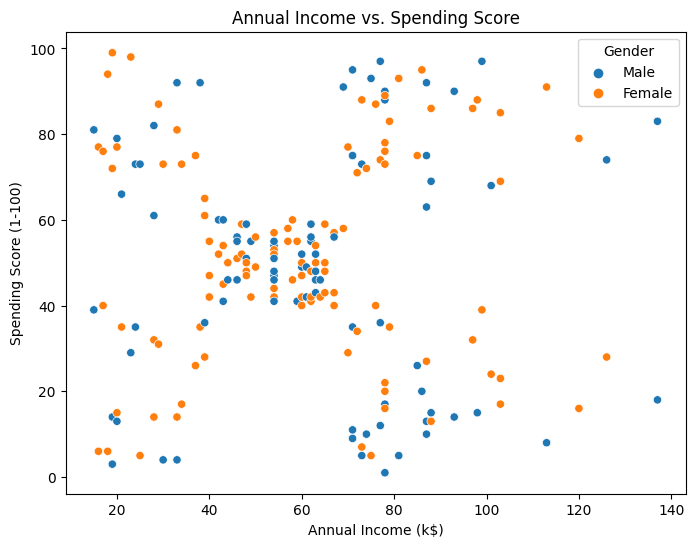

In [5]:
# Scatter plot of Annual Income vs. Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=customers)
plt.title('Annual Income vs. Spending Score')
plt.show()

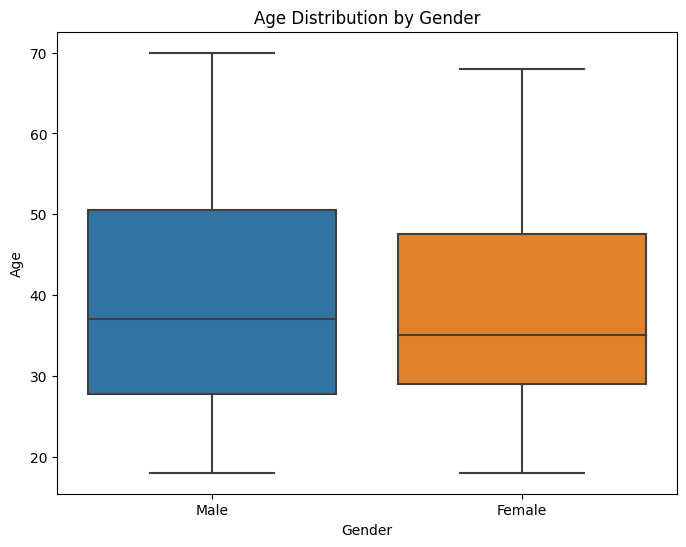

In [6]:
# Box plot for Age distribution by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=customers)
plt.title('Age Distribution by Gender')
plt.show()


<ipython-input-7-a63f6c4b56a3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = customers.corr()


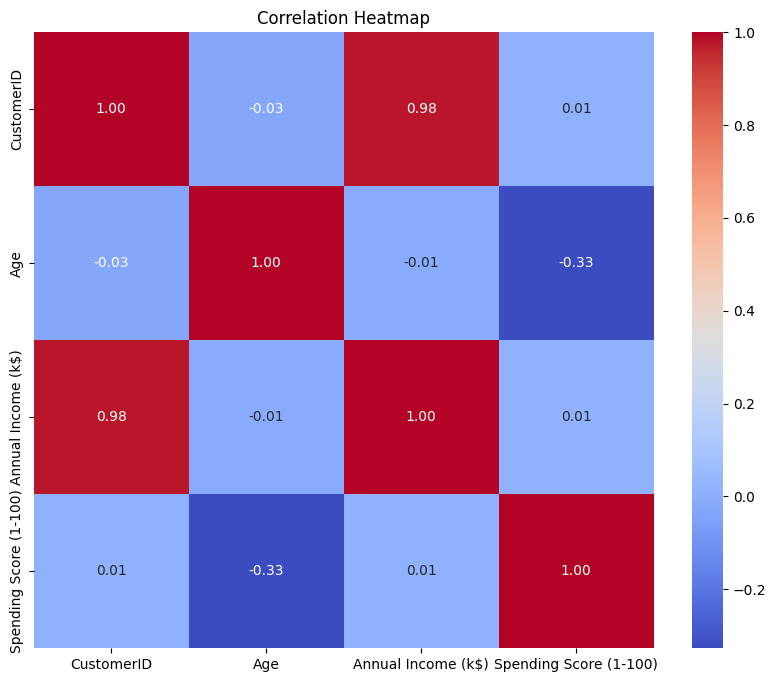

In [7]:
# Correlation heatmap of all variables
plt.figure(figsize=(10, 8))
corr_matrix = customers.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()




## Data Exploration


In [8]:
print(customers.head())
print(customers.info())
print(customers.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

## Data Preprocessing and Cleaning

In [11]:
#Label encoder converting categorical data into numerical values
# Convert 'Gender' to numerical values using Label Encoding
from sklearn.preprocessing import LabelEncoder
#data cleaning
le = LabelEncoder()
customers['Gender'] = le.fit_transform(customers['Gender'])

In [12]:
# Define a threshold for high spending score
threshold = 80

# Create the target variable 'HighSpender'
customers['HighSpender'] = (customers['Spending Score (1-100)'] > threshold).astype(int)

# Split data into features (X) and target (y)
X = customers[['Age', 'Gender', 'Annual Income (k$)']]
y = customers['HighSpender']


In [14]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:
# Standardize features (data preprocessing)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

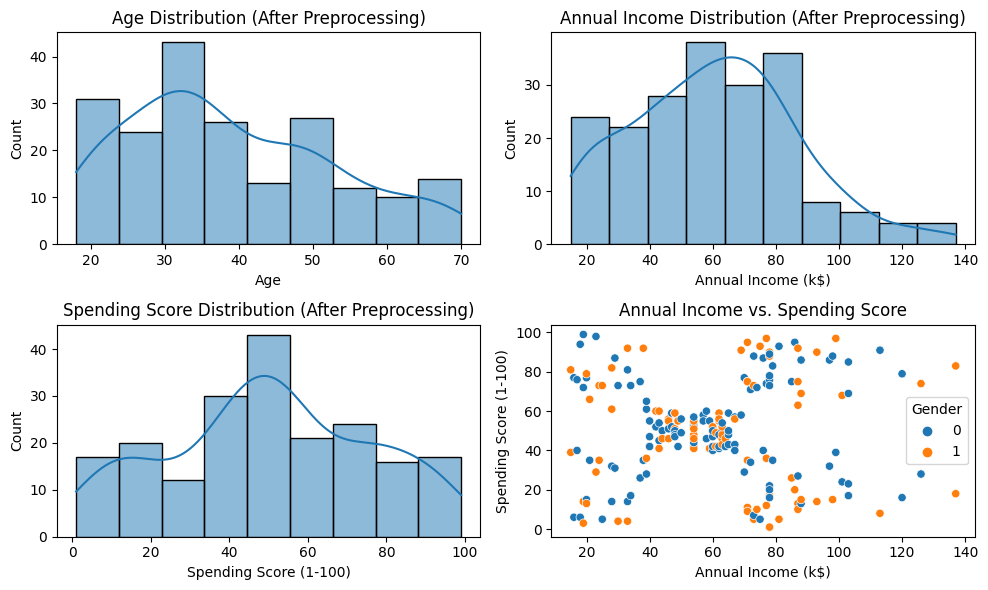

In [17]:
# Visualize preprocessed data
plt.figure(figsize=(10, 6))

# Histograms of numerical features
plt.subplot(2, 2, 1)
sns.histplot(customers['Age'], kde=True)
plt.title('Age Distribution (After Preprocessing)')

plt.subplot(2, 2, 2)
sns.histplot(customers['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution (After Preprocessing)')

plt.subplot(2, 2, 3)
sns.histplot(customers['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution (After Preprocessing)')

# Scatter plot of Annual Income vs. Spending Score
plt.subplot(2, 2, 4)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=customers)
plt.title('Annual Income vs. Spending Score')

plt.tight_layout()
plt.show()








### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
# Train a Logistic Regression model
model_log = LogisticRegression()
model_log.fit(X_train_scaled, y_train)

# Make predictions and probabilities
y_pred_log = model_log.predict(X_test_scaled)

y_proba_log = model_log.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## Evaluating the model

In [23]:
# Evaluate the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
accuracy = accuracy_score(y_test, y_pred_log)
classification_rep = classification_report(y_test, y_pred_log)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       0.00      0.00      0.00         1

    accuracy                           0.97        40
   macro avg       0.49      0.50      0.49        40
weighted avg       0.95      0.97      0.96        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


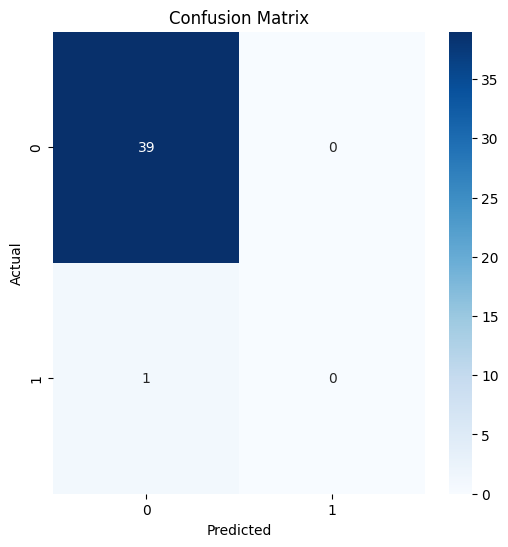

In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

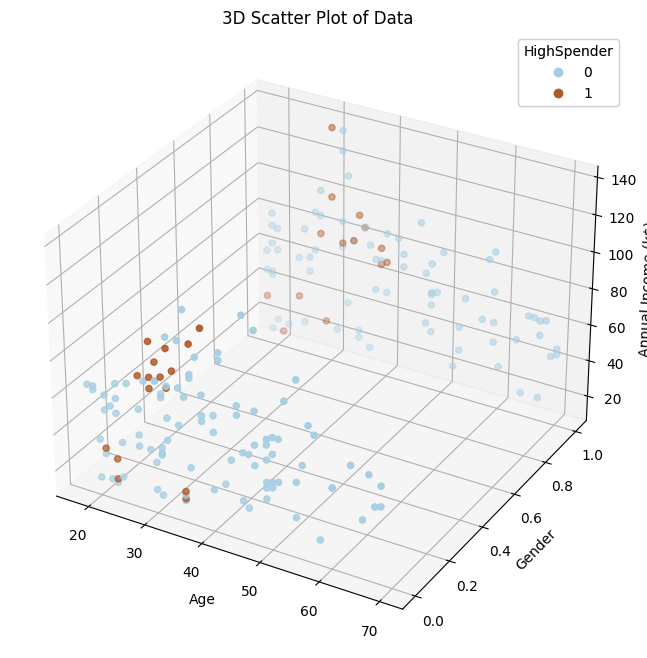

In [25]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X['Age'], X['Gender'], X['Annual Income (k$)'], c=y, cmap=plt.cm.Paired)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="HighSpender")
ax.add_artist(legend1)
ax.set_title("3D Scatter Plot of Data")
ax.set_xlabel('Age')
ax.set_ylabel('Gender')
ax.set_zlabel('Annual Income (k$)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


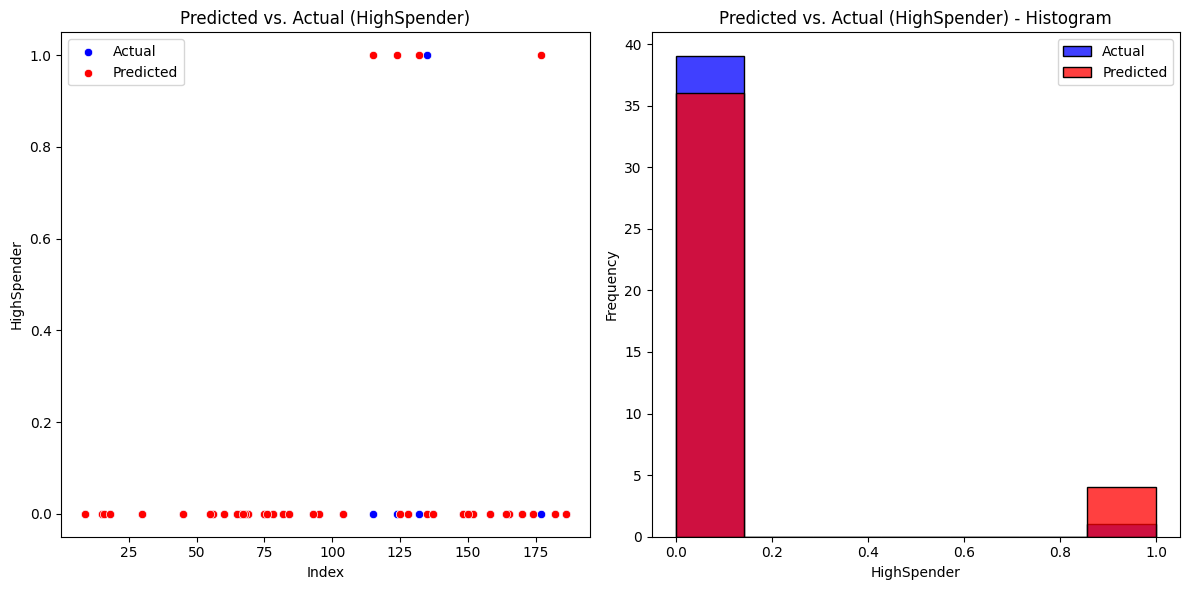

In [26]:
# Predicted vs. Actual Plots
y_pred = model_log.predict(X_test)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test.index, y=y_test, label='Actual', color='blue')
sns.scatterplot(x=y_test.index, y=y_pred, label='Predicted', color='red')
plt.title('Predicted vs. Actual (HighSpender)')
plt.xlabel('Index')
plt.ylabel('HighSpender')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(y_test, label='Actual', color='blue')
sns.histplot(y_pred, label='Predicted', color='red')
plt.title('Predicted vs. Actual (HighSpender) - Histogram')
plt.xlabel('HighSpender')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()



### SVM

In [28]:
# Train a SVM
from sklearn.svm import SVC
model_svc =  SVC(kernel='linear', random_state=42)
model_svc.fit(X_train_scaled, y_train)

# Make predictions and probabilities
y_pred_svc = model_svc.predict(X_test_scaled)


In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svc)
classification_rep = classification_report(y_test, y_pred_svc)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       0.00      0.00      0.00         1

    accuracy                           0.97        40
   macro avg       0.49      0.50      0.49        40
weighted avg       0.95      0.97      0.96        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


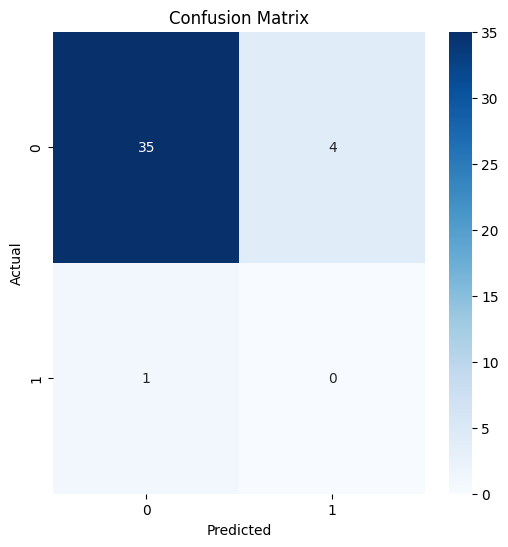

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

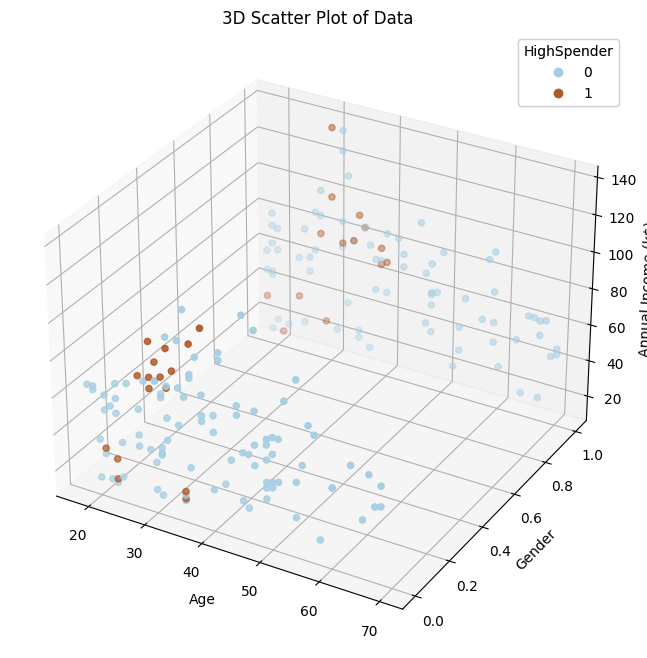

In [31]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X['Age'], X['Gender'], X['Annual Income (k$)'], c=y, cmap=plt.cm.Paired)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="HighSpender")
ax.add_artist(legend1)
ax.set_title("3D Scatter Plot of Data")
ax.set_xlabel('Age')
ax.set_ylabel('Gender')
ax.set_zlabel('Annual Income (k$)')
plt.show()

### Random Forest

In [32]:

from sklearn.ensemble import RandomForestClassifier


In [33]:
# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_random = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_random)
print(f"Accuracy of Random Forest Classifier: {accuracy:.2f}")


Accuracy of Random Forest Classifier: 0.90


In [34]:
print("Classification Report\n",classification_report(y_test,y_pred_random))

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.92      0.95        39
           1       0.00      0.00      0.00         1

    accuracy                           0.90        40
   macro avg       0.49      0.46      0.47        40
weighted avg       0.95      0.90      0.92        40



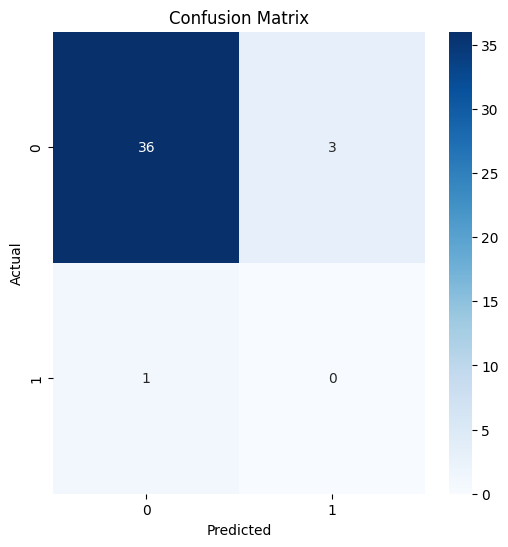

In [35]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_random)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

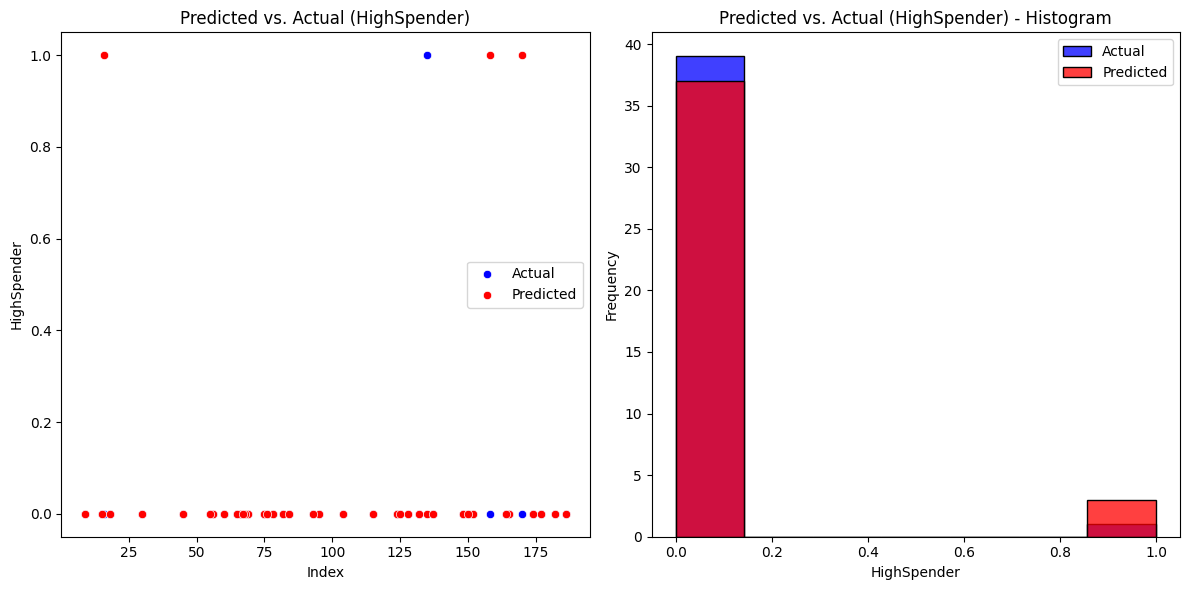

In [36]:
# Predicted vs. Actual Plots

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test.index, y=y_test, label='Actual', color='blue')
sns.scatterplot(x=y_test.index, y=y_pred_random, label='Predicted', color='red')
plt.title('Predicted vs. Actual (HighSpender)')
plt.xlabel('Index')
plt.ylabel('HighSpender')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(y_test, label='Actual', color='blue')
sns.histplot(y_pred_random, label='Predicted', color='red')
plt.title('Predicted vs. Actual (HighSpender) - Histogram')
plt.xlabel('HighSpender')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Neural network

In [37]:
import tensorflow as tf   #importing tensorflow

In [63]:
# Create a Sequential model
ann = tf.keras.models.Sequential()

# Add layers to the model
ann.add(tf.keras.layers.Dense(units=256, activation="relu", input_dim=X_train_scaled.shape[1]))
ann.add(tf.keras.layers.BatchNormalization())  # Adding batch normalization layer
ann.add(tf.keras.layers.Dense(units=128, activation="relu"))
ann.add(tf.keras.layers.Dropout(0.2))  # Adding dropout layer for regularization
ann.add(tf.keras.layers.Dense(units=64, activation="relu"))
ann.add(tf.keras.layers.BatchNormalization())  # Adding batch normalization layer
ann.add(tf.keras.layers.Dense(units=32, activation="relu"))
ann.add(tf.keras.layers.Dropout(0.3))  # Adding dropout layer for regularization
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping with patience and learning rate scheduling
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = ann.fit(X_train_scaled, y_train, epochs=100, batch_size=35, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

# Evaluate the model on test data
loss, accuracy = ann.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred = ann.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.55).astype(int)  # Convert probabilities to class labels







Epoch 1/100
4/4 [==============================] - 3s 88ms/step - loss: 0.8305 - accuracy: 0.5391 - val_loss: 0.6914 - val_accuracy: 0.5938 - lr: 0.0010
Epoch 2/100
4/4 [==============================] - 0s 22ms/step - loss: 0.6476 - accuracy: 0.6641 - val_loss: 0.6635 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 0.5603 - accuracy: 0.7344 - val_loss: 0.6424 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 0.5339 - accuracy: 0.7422 - val_loss: 0.6230 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 5/100
4/4 [==============================] - 0s 20ms/step - loss: 0.4591 - accuracy: 0.7891 - val_loss: 0.6064 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 0.4652 - accuracy: 0.7734 - val_loss: 0.5925 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 0.4789 - a

In [62]:
# Evaluate the model on test data
loss, accuracy = ann.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

2/2 [==============================] - 0s 9ms/step - loss: 0.2398 - accuracy: 0.9250
Test Accuracy: 0.9250
